<a href="https://colab.research.google.com/github/kocice/churn-prediction/blob/main/banque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

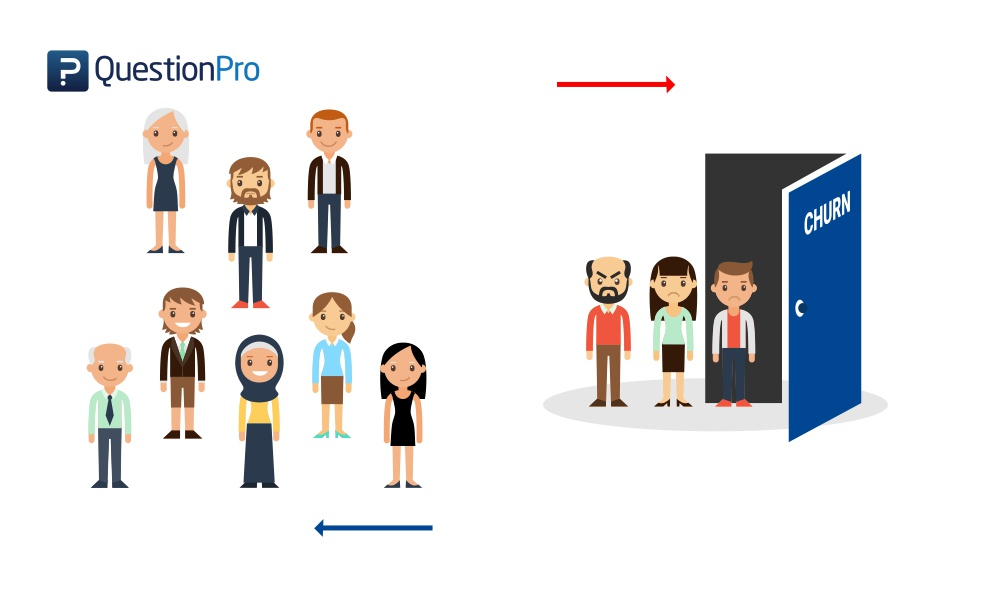

In [240]:
import numpy as np
import pandas as pd

In [241]:
fichier_url = "https://raw.githubusercontent.com/kocice/churn-prediction/main/Dataset.csv"
# data = pd.read_csv("Dataset.csv", sep=";", na_values="Unknown")
data = pd.read_csv(fichier_url, sep=";", na_values="Unknown")

In [242]:
df = data.copy()

In [243]:
df.drop('CLIENTNUM', axis=1, inplace=True)

In [244]:
df["Attrition_Flag"].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

Nous avons deux modalités pour la variable cible `Attrition_Flag`

- **Existing Customer**: 0
- **Attrited Customer**: 1

***On remarque une forte inegalité entre les proportions des modalités***

### Pourcentage de données manquantes par variable

In [245]:
(df.isna().sum()/df.shape[0])*100

Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category             10.980547
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
dtype: float64

Il n'y a pas de valeur manquante dans les variables quantitatives.

Seule trois variables possèdent des donnés manquante dont le pourcentage est inférieur à 15%

In [246]:
# b.columns

In [247]:
df_line = df.shape
# Récupperer le nombre de lignes manquantes
index_with_nan = df.index[df.isnull().any(axis=1)]
nbr_df_nan = len(np.array(index_with_nan).reshape(-1, 1))
print(f"Ligne du dataframe: {df_line[0]}")
print(f"Nombre de ligne manquante: {nbr_df_nan} \nRatio de ligne manquante: {(nbr_df_nan/df_line[0])*100}")
print("Pour toutes les colonnes confondus")

Ligne du dataframe: 10127
Nombre de ligne manquante: 3046 
Ratio de ligne manquante: 30.07800928211711
Pour toutes les colonnes confondus


In [248]:
# Suppresion des données manquantes
df.drop(index_with_nan, axis=0, inplace=True)
df.shape[0]

7081

In [249]:
(df.isna().sum()/df.shape[0])*100

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

Il n' y a plus de données manquantes Dataset

# Prétraitement
### Données d'entraînement et de test

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=0)

In [252]:
# On fait une découpe en respectant la repartition des données
train = trainset['Attrition_Flag'].value_counts(normalize=True)
test = testset['Attrition_Flag'].value_counts(normalize=True)
print(f"Donnée d'entrainement:\n{train}\n\n")
print(f"Donnée de test:\n{test}")

Donnée d'entrainement:
Existing Customer    0.839548
Attrited Customer    0.160452
Name: Attrition_Flag, dtype: float64


Donnée de test:
Existing Customer    0.852626
Attrited Customer    0.147374
Name: Attrition_Flag, dtype: float64


### Encodage des variable qualitatives ordinales

In [253]:

def encode_features_ordinal(dataframe, features_ordinals):
    '''
    Fonction permetant d'encoder des variables qualitatives ordinales
    :param dataframe: Fournir un dataframe
    :param variable: Fournir la liste de variable
    '''

    modalite = {
      'Uneducated': 0,
      'College': 1,
      'High School': 2,
      'Graduate': 3,
      'Post-Graduate': 4,
      'Doctorate': 5,
      'Less than $40K': 0,
      '$40K - $60K': 1,
      '$60K - $80K': 2,
      '$80K - $120K': 3,
      '$120K +': 4,
      'Blue': 0,
      'Silver': 1,
      'Gold': 2,
      'Platinum': 3
    }
    for col in features_ordinals:
        if dataframe[col].dtype == object:
            dataframe.loc[:,col] = dataframe[col].map(modalite)
    
    return dataframe

In [254]:
(df.isna().sum()/df.shape[0])*100

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

### Encodage des variable qualitatives nominales

In [255]:
def encodin_nominale(datframe, debug=True):
    """
    Fonction permetant de faire l'encodage des varibles qualitative nominale 
    en supprimant la variable dependante
    """
    if debug:
      features_nominals = ['Marital_Status', 'Gender']
    else:
      features_nominals = ['Gender']
    
    for var in features_nominals:
        if datframe[var].dtypes == 'object':
            modalite = datframe[var].unique()
            for index, mod in enumerate(modalite):
                if index == 0:
                    continue
                datframe[mod] = np.where(datframe[var]==mod, 1, 0)
            datframe.drop(columns=var,axis=1,inplace=True)
            
    return datframe

### Normalisation des variables qualitatives

In [256]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [257]:
from sklearn.compose import ColumnTransformer

In [258]:
def getNumericFeatures():
    numeric_features = []
    for col in df.columns:
        if df[col].dtypes == "int64" or df[col].dtypes == "float64":
            numeric_features.append(col)

    return numeric_features

In [259]:
df_test = df.copy()

In [260]:
numeric_features = getNumericFeatures()

# nous appliquons à ces colonnes une transformation
numeric_transformer = StandardScaler()

# on combine toutes ces informations dans un objet de la
# classe ColumnTransformer
preprocessor = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ]
)

In [261]:
def preprocessing(dataframe, debug=True, columns=['Education_Level', 'Income_Category', 'Card_Category']):
    
    Y = dataframe['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
    X = dataframe.drop('Attrition_Flag', axis=1)
    
    X = encode_features_ordinal(X, features_ordinals=columns)
    X = encodin_nominale(X, debug)
    
    return X, Y
 

In [262]:
X_train, Y_train = preprocessing(trainset)
# on applique les transformations sur toutes les colonnes
X_train[numeric_features] = preprocessor.fit_transform(X_train)

In [263]:
X_test, Y_test = preprocessing(testset)
X_test[numeric_features] = preprocessor.transform(X_test)

# Modelisation & Evaluation

In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import sklearn.metrics as metrics

In [265]:
import warnings
warnings.filterwarnings("ignore")

In [266]:
log = LogisticRegression(random_state=0)
# model_tree = DecisionTreeClassifier(random_state=0)
model_svc = SVC(random_state=0)
model_boost = AdaBoostClassifier(random_state=0)
modele_rf = RandomForestClassifier(random_state=0)
gd_boost = GradientBoostingClassifier(random_state=0)

In [267]:
dict_of_models = {'RandomForest': modele_rf,
                  'AdaBoost' : model_boost,
                  'SVM': model_svc,
                  'LogisticRegression': log,
                  'GradientBoostingClassifier': gd_boost
#                   'DecisionTreeClassifier': DecisionTreeClassifier
                 }

In [268]:
def evaluation(model):
    
    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)
    
    print(f"Entraînement: {model.score(X_train, Y_train)}\nTest: {model.score(X_test, Y_test)}")
    print(pd.DataFrame(confusion_matrix(Y_test, ypred)))
    print(classification_report(Y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, Y_train,
                                               cv=4, scoring='recall',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 5))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title(model, fontsize=24)
    plt.legend()

RandomForest
Entraînement: 1.0
Test: 0.9632975719932242
      0    1
0  1502    8
1    57  204
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1510
           1       0.96      0.78      0.86       261

    accuracy                           0.96      1771
   macro avg       0.96      0.89      0.92      1771
weighted avg       0.96      0.96      0.96      1771

AdaBoost
Entraînement: 0.9619585687382297
Test: 0.9531338226990401
      0    1
0  1476   34
1    49  212
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1510
           1       0.86      0.81      0.84       261

    accuracy                           0.95      1771
   macro avg       0.91      0.89      0.90      1771
weighted avg       0.95      0.95      0.95      1771

SVM
Entraînement: 0.9410546139359699
Test: 0.9333709768492378
      0    1
0  1489   21
1    97  164
              precision    recall  f1-score 

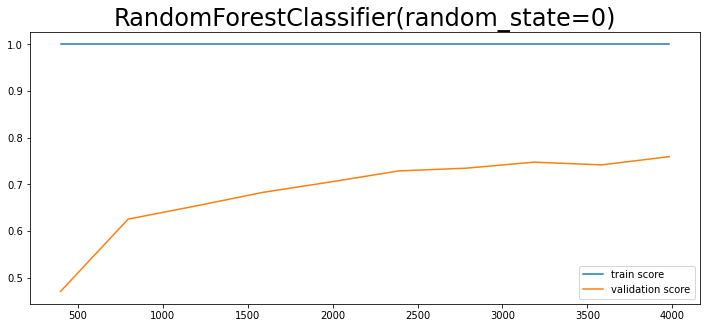

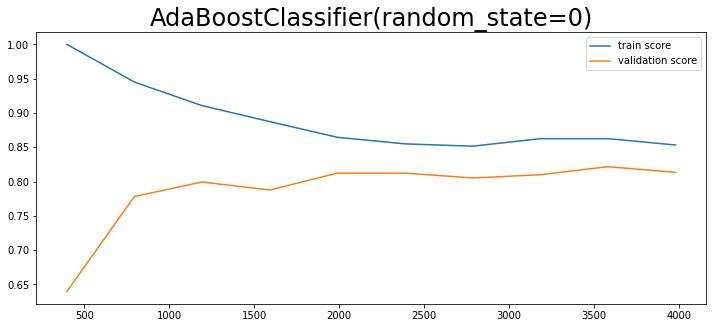

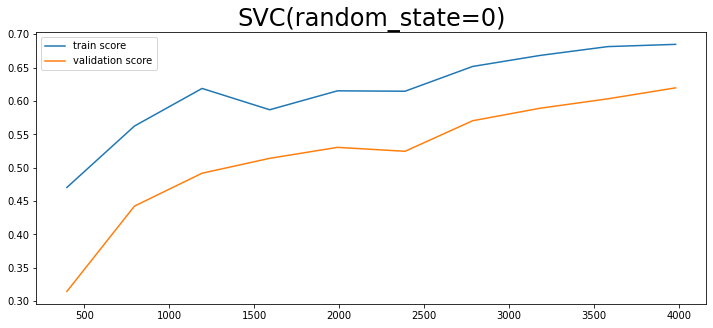

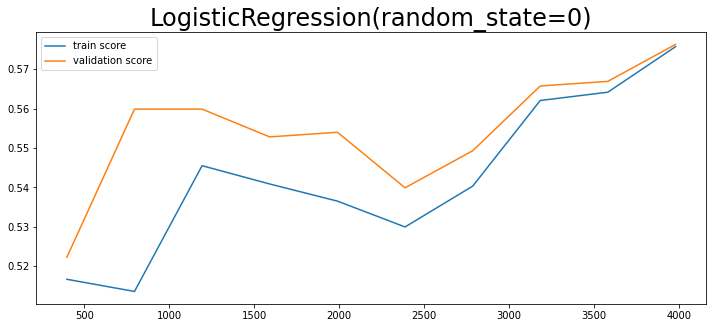

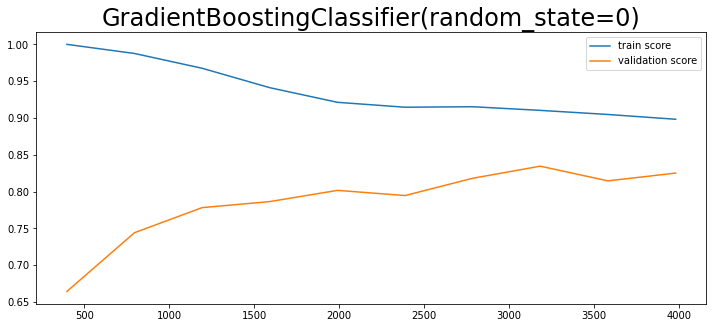

In [269]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

**Dans cet exemple le meilleur modèle est le Adaboost**

Nous pourions envisager de travailler avec:
- Le modèle de **`AdaBoost`**
- Le modèle de **`GradientBoostingClassifier`**

En nous bassant sur `l'accuracy` ***le taux de bien classé***

et le `recall` de bien classé pour ***la modalité positive***

Le Modèle SVM n'arrive pas à avoir de bonne performance

## Feature selection

In [270]:
gd_boost.fit(X_train, Y_train)
ypred_gd_boost = model.predict(X_test)
model_boost.fit(X_train, Y_train)
ypred_model_boost = model.predict(X_test)

Pour la suite nous allons travailler avec le **`GradientBoostingClassifier`**

In [271]:
gd_boost.feature_importances_

array([2.07033311e-02, 4.97596297e-04, 4.85747013e-05, 5.78768964e-04,
       1.26117115e-03, 1.45699215e-03, 8.68971092e-02, 2.09646555e-02,
       1.38454095e-02, 4.55793253e-04, 1.86261324e-01, 2.47957868e-03,
       4.63829511e-02, 1.98787242e-01, 3.12076635e-01, 1.03502445e-01,
       2.28387219e-03, 2.45009842e-04, 6.02766242e-06, 1.26551215e-03])

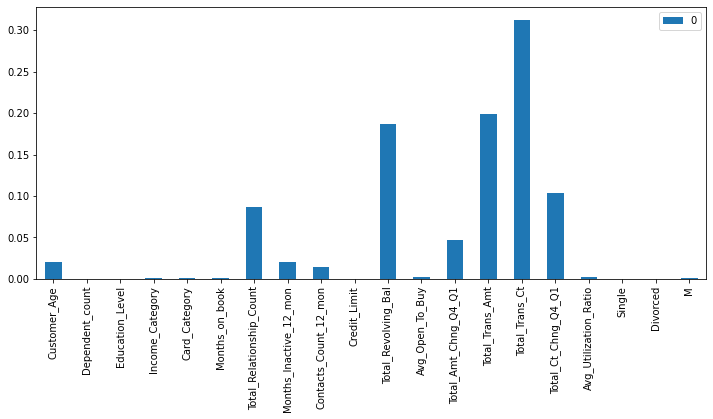

In [272]:
pd.DataFrame(gd_boost.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 5))

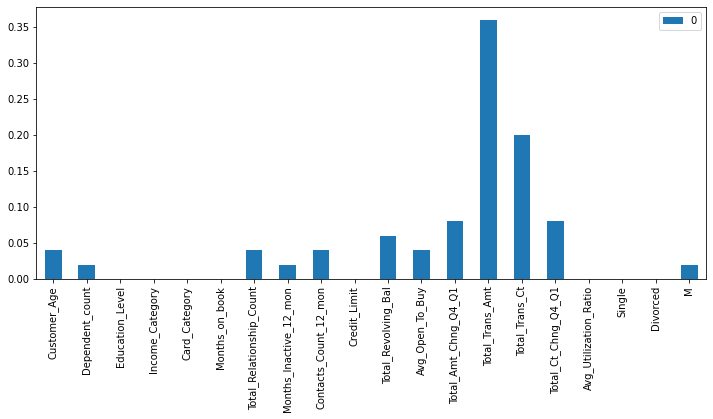

In [273]:
pd.DataFrame(model_boost.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 5))

In [274]:
feature_gd_boost = pd.DataFrame(gd_boost.feature_importances_, index=X_train.columns)
best_data1 = feature_gd_boost.T
b = pd.DataFrame(best_data1>=0.04)
b = b[b == True].dropna(1)

In [275]:
b.columns

Index(['Total_Relationship_Count', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

In [276]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [277]:
final_df = data.drop(['Income_Category', 'Education_Level', 'Marital_Status'], axis=1)
final_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


**Poursuivre avec le jeux de donnée initial (pour conserver l'intéralité des données)**

In [278]:
feature_model_boost = pd.DataFrame(model_boost.feature_importances_, index=X_train.columns)
best_data2 = feature_model_boost.T
a = pd.DataFrame(best_data2>=0.04)
a = a[a==True].dropna(1)
a

,Customer_Age,Total_Relationship_Count,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,True,True,True,True,True,True,True,True,True


In [279]:
trainset, testset = train_test_split(final_df, test_size=0.25, random_state=0)

X_train, Y_train = preprocessing(trainset, debug=False, columns=['Card_Category'])
# on applique les transformations sur toutes les colonnes
X_train[numeric_features] = preprocessor.fit_transform(X_train)

X_test, Y_test = preprocessing(testset, debug=False, columns=['Card_Category'])
X_test[numeric_features] = preprocessor.transform(X_test)

In [280]:
a.columns

Index(['Customer_Age', 'Total_Relationship_Count', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

Selection des variables les plus pertinantes pour les deux meilleurs modèles

In [281]:
X_train = X_train[b.columns]
X_test = X_test[b.columns]
X_test

,Total_Relationship_Count,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
3358,0.768201,0.534190,0.069281,-0.223578,-0.243740,0.786113
9951,-1.162469,-1.416670,1.272202,1.325879,-0.201123,-0.725227
3848,-0.518913,1.290347,0.228157,0.039859,0.097197,-0.928119
1666,1.411757,0.153058,1.244966,-0.738398,-1.351785,2.015888
8383,-1.162469,1.113218,0.427888,0.333874,0.267666,1.071818
...,...,...,...,...,...,...
1652,-0.518913,0.802937,-0.439123,-0.542878,0.097197,-0.157957
5252,-0.518913,1.658042,-0.289326,0.047797,0.779071,0.065639
6955,1.411757,-1.416670,0.119214,0.225088,0.651220,0.268531
8865,-1.162469,1.259807,-0.352876,1.028336,1.247860,-0.141394


In [282]:
dict_of_models = {'RandomForest': modele_rf,
                  'AdaBoost' : model_boost,
                  'GradientBoostingClassifier': gd_boost
                 }

RandomForest
Entraînement: 1.0
Test: 0.9605055292259084
      0    1
0  2110   38
1    62  322
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2148
           1       0.89      0.84      0.87       384

    accuracy                           0.96      2532
   macro avg       0.93      0.91      0.92      2532
weighted avg       0.96      0.96      0.96      2532

AdaBoost
Entraînement: 0.954312047399605
Test: 0.9486571879936809
      0    1
0  2091   57
1    73  311
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2148
           1       0.85      0.81      0.83       384

    accuracy                           0.95      2532
   macro avg       0.91      0.89      0.90      2532
weighted avg       0.95      0.95      0.95      2532

GradientBoostingClassifier
Entraînement: 0.9686635944700461
Test: 0.9593206951026856
      0    1
0  2118   30
1    73  311
              precisio

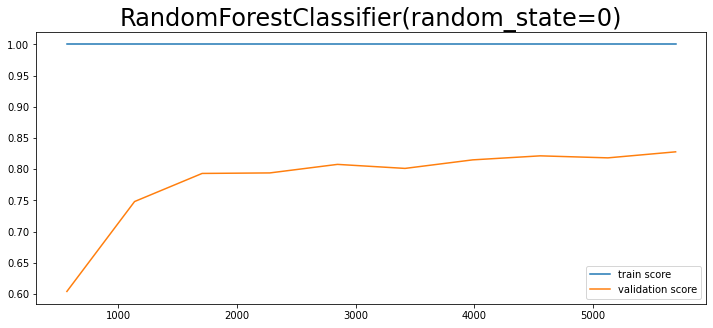

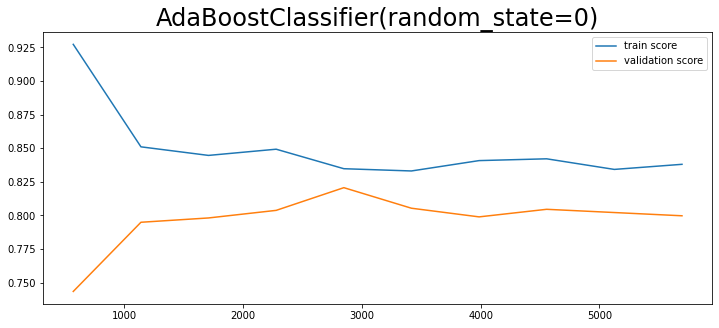

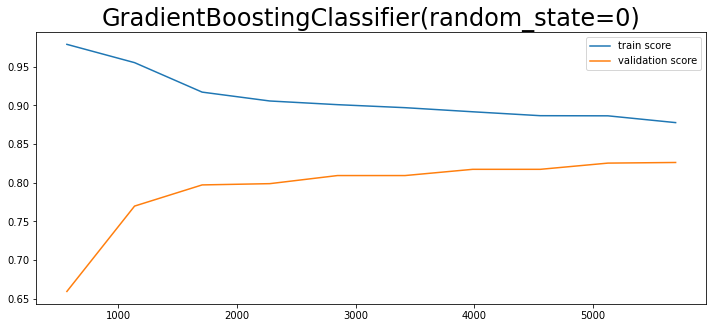

In [283]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [284]:
print(gd_boost)

GradientBoostingClassifier(random_state=0)


(*, loss="deviance", learning_rate=0.1, n_estimators=100, subsample=1, criterion="friedman_mse", min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, max_depth=3, min_impurity_decrease=0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0)

In [285]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [286]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [287]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
# max_features = 'auto'
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

# construction des dictionnaires d’hyperparamètres
dico_param_gd = {
    "learning_rate": [0.001,0.01,0.1,0.25,0.5, 0.3, 0.4],
    # 'n_estimators': n_estimators,
    "max_depth": max_depth,
    # 'min_samples_split': min_samples_split,
    # 'min_samples_leaf': min_samples_leaf,
}

random_grid_rf = {
    'n_estimators': n_estimators,
    # 'max_features': max_features,
    'max_depth': max_depth,
    # 'min_samples_split': min_samples_split,
    # 'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [288]:
modele_grid_gd=GridSearchCV(estimator=gd_boost, param_grid=dico_param_gd, 
                          cv=3, n_jobs=-1, verbose=2)

modele_grid_rf=GridSearchCV(estimator=modele_rf, param_grid=random_grid_rf, 
                            cv=3, n_jobs=-1, verbose=2)

In [289]:
# estimation des paramètres et des meilleurs modèles
modele_grid_gd.fit(X_train,Y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.3,
                                           0.4],
                         'max_depth': [10, 35, 60, 85, 110, None]},
             verbose=2)

In [290]:
# estimation des paramètres et des meilleurs modèles
modele_grid_rf.fit(X_train,Y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 35, 60, 85, 110, None],
                         'n_estimators': [100, 325, 550, 775, 1000]},
             verbose=2)

In [291]:
# affichage des AUC pour la combinaison obtenant
# les meilleurs résultats
print("Meilleurs paramètres GD:", modele_grid_gd.best_params_)
print("AUC - GD:", modele_grid_gd.best_score_)
print("Meilleurs paramètres RandomForest:", modele_grid_rf.best_params_)
print("AUC - RandomForest:", modele_grid_rf.best_score_)

Meilleurs paramètres GD: {'learning_rate': 0.5, 'max_depth': 10}
AUC - GD: 0.9568136570454744
Meilleurs paramètres RandomForest: {'bootstrap': True, 'max_depth': 35, 'n_estimators': 100}
AUC - RandomForest: 0.9578668429327836


In [292]:
print("Meilleurs paramètres GD:", modele_grid_gd.best_estimator_)
print("Meilleurs paramètres RF:", modele_grid_rf.best_estimator_)

Meilleurs paramètres GD: GradientBoostingClassifier(learning_rate=0.5, max_depth=10, random_state=0)
Meilleurs paramètres RF: RandomForestClassifier(max_depth=35, random_state=0)


In [293]:
gd_boost = GradientBoostingClassifier(learning_rate=0.5, max_depth=10, random_state=0)
rf = RandomForestClassifier(bootstrap=False, max_depth=35, n_estimators=775, random_state=0)

Entraînement: 0.9989466754443713
Test: 0.9644549763033176
      0    1
0  2111   37
1    53  331
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2148
           1       0.90      0.86      0.88       384

    accuracy                           0.96      2532
   macro avg       0.94      0.92      0.93      2532
weighted avg       0.96      0.96      0.96      2532



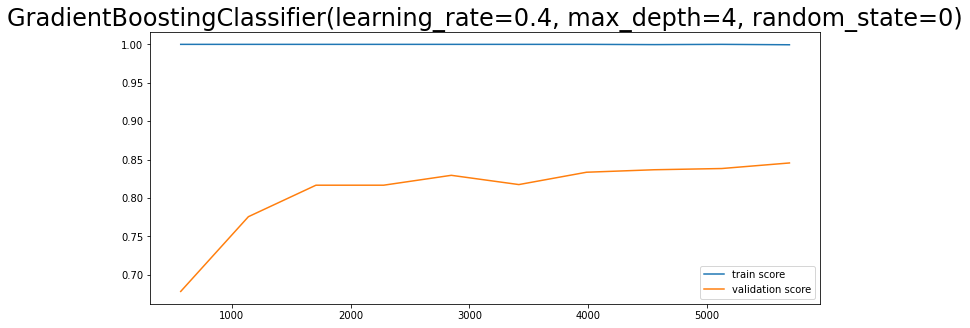

In [294]:
gd_boost.fit(X_train, Y_train)
ypred = gd_boost.predict(X_test)

print(f"Entraînement: {gd_boost.score(X_train, Y_train)}\nTest: {gd_boost.score(X_test, Y_test)}")
print(pd.DataFrame(confusion_matrix(Y_test, ypred)))
print(classification_report(Y_test, ypred))

N, train_score, val_score = learning_curve(gd_boost, X_train, Y_train,
                                           cv=4, scoring='recall',
                                           train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12, 5))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title(gd_boost, fontsize=24)
plt.legend()

Entraînement: 1.0
Test: 0.9565560821484992
      0    1
0  2102   46
1    64  320
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2148
           1       0.87      0.83      0.85       384

    accuracy                           0.96      2532
   macro avg       0.92      0.91      0.91      2532
weighted avg       0.96      0.96      0.96      2532



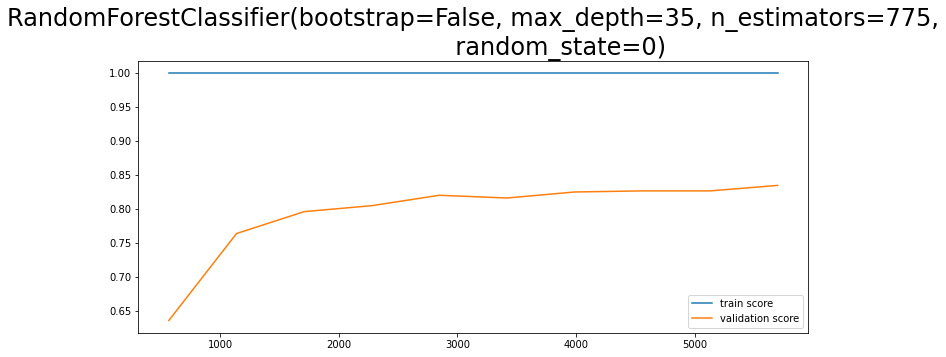

In [295]:
rf.fit(X_train, Y_train)
ypred = rf.predict(X_test)

print(f"Entraînement: {rf.score(X_train, Y_train)}\nTest: {rf.score(X_test, Y_test)}")
print(pd.DataFrame(confusion_matrix(Y_test, ypred)))
print(classification_report(Y_test, ypred))

N, train_score, val_score = learning_curve(rf, X_train, Y_train,
                                           cv=4, scoring='recall',
                                           train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12, 5))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title(rf, fontsize=24)
plt.legend()

In [296]:
# on prédit grâce à ce modèle
y_predict = gd_boost.predict(X_test)

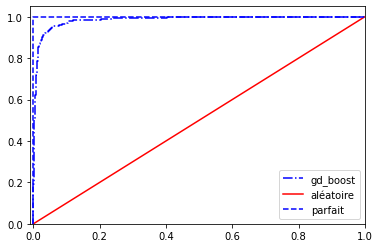

In [297]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve

# on extrait les probabilités d'appartenance
proba_ped = gd_boost.predict_proba(X_test)[:,1]

# cas du modèle RF
fpr, tpr, _ = roc_curve(Y_test, proba_ped)
plt.plot(fpr,tpr,"b-.", label="gd_boost")

# modèle aléatoire
plt.plot([0, 1], [0, 1],"r-", label="aléatoire", )

# modèle parfait
plt.plot([0,0, 1], [0,1, 1], 'b--', label="parfait")

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()

In [298]:
from sklearn.metrics import roc_auc_score
auc_modele = roc_auc_score(Y_test, gd_boost.predict_proba(X_test)[:,1])

print("Aire sous la courbe ROC pour le modèle logistique :" , auc_modele)

Aire sous la courbe ROC pour le modèle logistique : 0.9851848618870268
